# Computergestützte Mathematik zur Analysis

14.01.2021

Prof. Dr. Rüdiger Braun

Bitte nehmen Sie an der Umfrage zum CHE-Ranking teil

In [1]:
from sympy import *
init_printing()

In [2]:
x = S('x')
y = S('y')
f = -x**4/2 - x**2*y**2 - y**4/2 + x**3 - 3*x*y**2

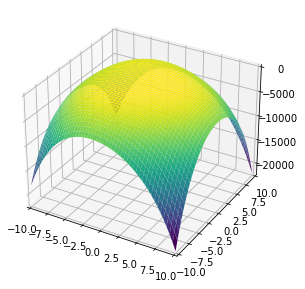

In [3]:
plotting.plot3d(f);

Das ist zwar richtig, man sieht aber nix.

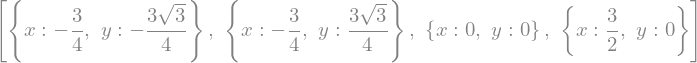

In [5]:
gr = Matrix([f]).jacobian([x,y])
lsg = solve(gr, {x,y})
lsg

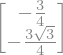

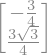

In [8]:
for l in lsg:
    display(Matrix([x,y]).subs(l))

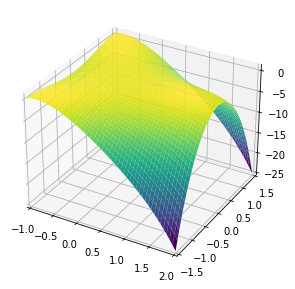

In [9]:
plotting.plot3d(f, (x, -1, 2), (y, -1.5, 1.5));

Polarkoordinaten

In [10]:
r = Symbol('r', positive=True)
phi = Symbol('phi', real=True)

In [11]:
polarkoord = {x: r*cos(phi), y: r*sin(phi)}

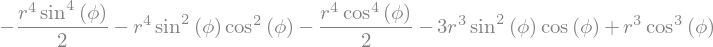

In [12]:
f_polar = f.subs(polarkoord)
f_polar

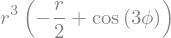

In [13]:
f_p = f_polar.simplify()
f_p

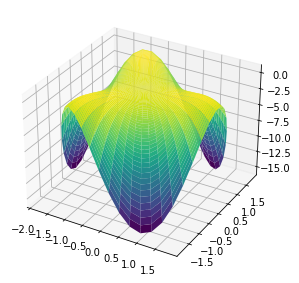

In [14]:
p = plotting.plot3d_parametric_surface(x.subs(polarkoord), y.subs(polarkoord), f_p, (r,0,2), (phi,-pi,pi));

Zwei Ideen, um die Graphik zu verdeutlichen:

* Bildwerte unterhalb von $z=-1$ abschneiden
* Unterschiede durch Farbe herausarbeiten

In [15]:
import numpy as np

In [17]:
def atan_z(x,y,z):
    return np.arctan(z)

In [18]:
p[0].surface_color = atan_z

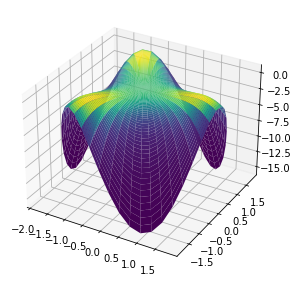

In [19]:
p.show()

In [20]:
p_null = p[0]

In [22]:
# p_null.nb_of_points_u

In [23]:
p_null.nb_of_points_u = 175
p_null.nb_of_points_v = 180

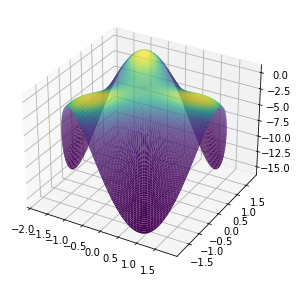

In [24]:
p.show()

# `numpy` und universal fucntions

In [25]:
import numpy as np

In [28]:
pi.n()

In [31]:
    A1 = np.array([1,2,3])
    A1

array([1, 2, 3])

Ein eindimensionaler `array` ist wie ein Vektor.

In [32]:
3*A1

array([3, 6, 9])

In [33]:
A1**2

array([1, 4, 9])

In [36]:
A2 = np.array([[1,2,3], [4,5,6]])
A2

array([[1, 2, 3],
       [4, 5, 6]])

In [37]:
A2**2

array([[ 1,  4,  9],
       [16, 25, 36]])

In [41]:
# A2.T * A2  # ValueError

Ein 2D-Array ist nicht wie eine Matrix

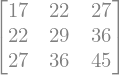

In [43]:
Matrix(A2).T * Matrix(A2)

In [44]:
A2.T @ A2

array([[17, 22, 27],
       [22, 29, 36],
       [27, 36, 45]])

In [38]:
A1 

array([1, 2, 3])

In [45]:
A2

array([[1, 2, 3],
       [4, 5, 6]])

In [46]:
A1 * A2

array([[ 1,  4,  9],
       [ 4, 10, 18]])

Aus dem 1D-Array wird durch Wiederholung der Zeile ein 2D-Array gemacht, der dann punktweise mit dem anderen multipliziert wird.

#### Broadcasting

Wenn zwei Arrays mit unterschiedlichen Shapes miteinander verknüpft werden und es eine gemeinsame Shape gibt, die beide umfasst, so werden beide Array auf diese Shape aufgefüllt.  Dasselbe gilt für die Verknüpfung von Array mit Skalaren.

Indizierung

In [48]:
A1[1]

2

In [49]:
A1[-1]

3

In [50]:
A2[1:, :]

array([[4, 5, 6]])

In [47]:
A2, A2.reshape(3,2)

(array([[1, 2, 3],
        [4, 5, 6]]),
 array([[1, 2],
        [3, 4],
        [5, 6]]))

In [52]:
A2.flatten()

array([1, 2, 3, 4, 5, 6])

Vordefinierte Arrays

In [51]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [53]:
x = np.linspace(0, 10*np.pi)
x

array([ 0.        ,  0.64114136,  1.28228272,  1.92342407,  2.56456543,
        3.20570679,  3.84684815,  4.48798951,  5.12913086,  5.77027222,
        6.41141358,  7.05255494,  7.69369629,  8.33483765,  8.97597901,
        9.61712037, 10.25826173, 10.89940308, 11.54054444, 12.1816858 ,
       12.82282716, 13.46396852, 14.10510987, 14.74625123, 15.38739259,
       16.02853395, 16.6696753 , 17.31081666, 17.95195802, 18.59309938,
       19.23424074, 19.87538209, 20.51652345, 21.15766481, 21.79880617,
       22.43994753, 23.08108888, 23.72223024, 24.3633716 , 25.00451296,
       25.64565432, 26.28679567, 26.92793703, 27.56907839, 28.21021975,
       28.8513611 , 29.49250246, 30.13364382, 30.77478518, 31.41592654])

In [54]:
len(x)

# universal functions

In [56]:
np.sin(x)**2

array([0.00000000e+00, 3.57736207e-01, 9.19044052e-01, 8.80722979e-01,
       2.97608328e-01, 4.10499309e-03, 4.20200052e-01, 9.50484434e-01,
       8.36150445e-01, 2.40803716e-01, 1.63525685e-02, 4.83974211e-01,
       9.74527874e-01, 7.86058330e-01, 1.88255099e-01, 3.65416213e-02,
       5.48011513e-01, 9.90779578e-01, 7.31269145e-01, 1.40825325e-01,
       6.43406479e-02, 6.11260467e-01, 9.98972696e-01, 6.72682527e-01,
       9.92931891e-02, 9.92931891e-02, 6.72682527e-01, 9.98972696e-01,
       6.11260467e-01, 6.43406479e-02, 1.40825325e-01, 7.31269145e-01,
       9.90779578e-01, 5.48011513e-01, 3.65416213e-02, 1.88255099e-01,
       7.86058330e-01, 9.74527874e-01, 4.83974211e-01, 1.63525685e-02,
       2.40803716e-01, 8.36150445e-01, 9.50484434e-01, 4.20200052e-01,
       4.10499309e-03, 2.97608328e-01, 8.80722979e-01, 9.19044052e-01,
       3.57736207e-01, 1.49975978e-30])

In [58]:
%%timeit
np.sin(x)**2

3.9 µs ± 143 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [59]:
%%timeit
res = []
for xx in x:
    res.append(sin(xx)**2)

352 µs ± 9.67 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [61]:
# sin(x)  # AttributeError

In [62]:
np.sin(x).dtype

dtype('float64')

In [63]:
type(sin(3.14))

sympy.core.numbers.Float

In [64]:
type(float(sin(3.14))) 

float

# `pyplot`

In [65]:
from matplotlib import pyplot as plt

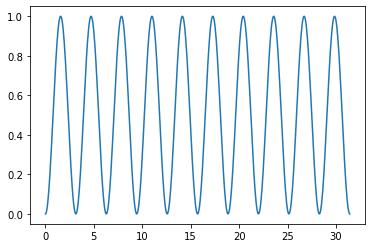

In [69]:
y = np.sin(x)**2
plt.plot(x, y);

Linie weniger dünn und zackelig:

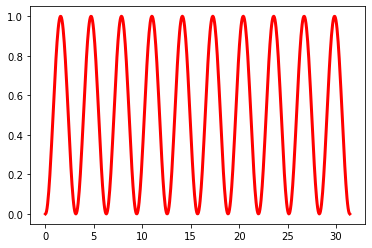

In [66]:
x = np.linspace(0, 10*np.pi, 550)
y = np.sin(x)**2
plt.plot(x, y, 'r', linewidth=3);

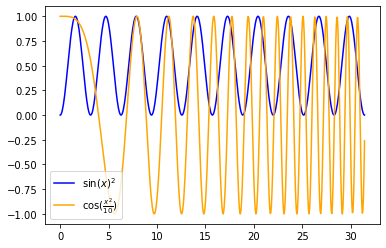

In [70]:
z = np.cos(.1*x**2)
plt.plot(x, y, 'b', label="$\\sin(x)^2$")
plt.plot(x, z, label="$\\cos(\\frac{x^2}{10})$", color='orange')
plt.legend();

Farben als Kürzel  (Alternativen später)

|b   |g    |r  |c   |m      |y     |k    |w    |
|----|-----|---|----|-------|------|-----|-----|
|blue|green|red|cyan|magenta|yellow|black|white|

Farbkodierung der Funktionswerte

In [71]:
xn = np.linspace(-2*np.pi, 2*np.pi)
yn = xn.copy()
X, Y = np.meshgrid(xn, yn)
X[:5, :5]

array([[-6.28318531, -6.02672876, -5.77027222, -5.51381568, -5.25735913],
       [-6.28318531, -6.02672876, -5.77027222, -5.51381568, -5.25735913],
       [-6.28318531, -6.02672876, -5.77027222, -5.51381568, -5.25735913],
       [-6.28318531, -6.02672876, -5.77027222, -5.51381568, -5.25735913],
       [-6.28318531, -6.02672876, -5.77027222, -5.51381568, -5.25735913]])

In [72]:
X.shape

In [73]:
Y[:5, :5]

array([[-6.28318531, -6.28318531, -6.28318531, -6.28318531, -6.28318531],
       [-6.02672876, -6.02672876, -6.02672876, -6.02672876, -6.02672876],
       [-5.77027222, -5.77027222, -5.77027222, -5.77027222, -5.77027222],
       [-5.51381568, -5.51381568, -5.51381568, -5.51381568, -5.51381568],
       [-5.25735913, -5.25735913, -5.25735913, -5.25735913, -5.25735913]])

In [75]:
Z = np.cos(np.sqrt(X**2+Y**2))

In [76]:
ausmass = (xn[0], xn[-1], yn[0], yn[-1])

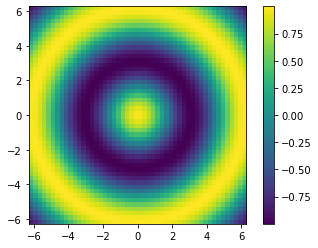

In [78]:
plt.imshow(Z, origin='lower', extent=ausmass)
plt.colorbar();

In [77]:
noether = plt.imread('noether.png')
noether.shape

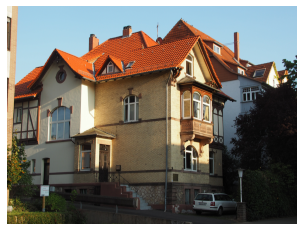

In [81]:
plt.imshow(noether)
plt.axis('off');

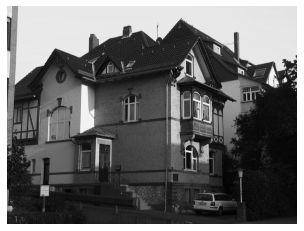

In [80]:
plt.imshow(noether[:,:,2], cmap=plt.cm.gray)
plt.axis('off');

`sympy`-Ausdruck -> universal function

In [82]:
x = S('x')
y = S('y')

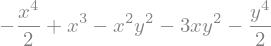

In [84]:
f

In [85]:
f_univ = lambdify((x,y), f, "numpy")

Das Argument `"numpy"` ist hier ausnahmsweise nicht nötig.  

Eine Alternative zu `"numpy"` ist `"mpmath"` bei zahlentheoretischen Fragestellungen.

In [87]:
f_univ(.1, .3)

In [88]:
xn = np.linspace(-1, 2)
yn = np.linspace(-1.5, 1.5)
X, Y = np.meshgrid(xn, yn)

In [89]:
Z = f_univ(X, Y)

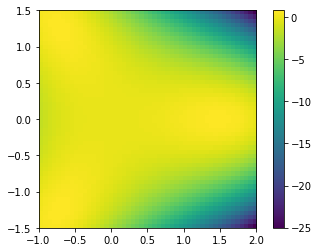

In [91]:
plt.imshow(Z, origin='lower', extent=(xn[0], xn[-1], yn[0], yn[-1]))
plt.colorbar();

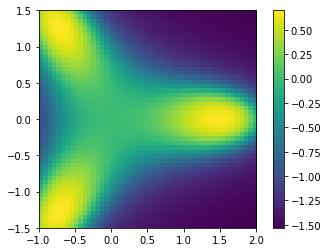

In [90]:
plt.imshow(np.arctan(Z), origin='lower', extent=(xn[0], xn[-1], yn[0], yn[-1]))
plt.colorbar();